In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
FOTR_sentiments=pd.read_csv(r'C:\Users\Nick\Desktop\GitProjects\NLP_projects\FOTR\FOTR_sentiments.csv')
FOTR_sentiments=FOTR_sentiments.drop(columns=['Unnamed: 0'])
FOTR_sentiments.head()

Volume      Book                      Chapters                                               Text  Total_words  Lex_density  Lex_density_norm  Negative   Neutral  Positive  Compound    Rating  Polarity  Subjectivity  Positive_NRC  Negative_NRC     Anger  Anticipation   Disgust      Fear       Joy   Sadness  Surprise     Trust  word_count  Rating_num
0   FOTR  Prologue            Concerning Hobbits  1. Concerning Hobbits     This book is largely...        19430     0.290210          0.290210  0.043674  0.880891  0.075450  0.133970  Positive  0.123098      0.453589      0.040636      0.016411  0.007033      0.020057  0.002605  0.010419  0.012764  0.010159  0.005991  0.019536        3839           1
1   FOTR  Prologue          Concerning Pipe-weed  2. Concerning Pipe-weed     There is another a...         3355     0.466338          0.466338  0.014870  0.903565  0.081609  0.239865  Positive  0.191711      0.472525      0.041176      0.014706  0.001471      0.029412  0.001471  0.007353  0.023529  0.011765  0.017647  0.022059         680           1
2   FOTR  Prologue  Of the Ordering of the Shire  3. Of the Ordering of the Shire     The Shire ...         4696     0.442961          0.442961  0.041147  0.903382  0.055471  0.042571   Neutral  0.097907      0.441715      0.041183      0.017951  0.004224      0.020063  0.002112  0.010560  0.016895  0.002112  0.003168  0.030623         947           0
3   FOTR  Prologue    Of the Finding of the Ring  4. Of the Finding of the Ring     As is told i...         8576     0.335784          0.335784  0.075471  0.841000  0.083485  0.075828  Positive  0.041690      0.336673      0.042611      0.026969  0.011866      0.029126  0.007551  0.017260  0.019957  0.016721  0.022114  0.027508        1854           1
4   FOTR  Prologue     NOTE ON THE SHIRE RECORDS  NOTE ON THE SHIRE RECORDS     At the end of th...         5279     0.377682          0.377682  0.025703  0.914108  0.060162  0.115635  Positive  0.220372      0.394603      0.034985      0.010690  0.001944      0.008746  0.001944  0.004859  0.005831  0.003887  0.002915  0.018465        1029           1

## Create dataframe without prologue

In [25]:
FOTR_sentiments_nopro = FOTR_sentiments.drop(FOTR_sentiments.index[[0,1,2,3,4]])
FOTR_sentiments_nopro

Volume     Book                          Chapters                                               Text  Total_words  Lex_density  Lex_density_norm  Negative   Neutral  Positive  Compound    Rating  Polarity  Subjectivity  Positive_NRC  Negative_NRC     Anger  Anticipation   Disgust      Fear       Joy   Sadness  Surprise     Trust  word_count  Rating_num
5    FOTR   Book I             A Long-expected Party  Chapter 1 . A Long-expected Party   When Mr. B...        55003     0.197489          0.197489  0.050563  0.854325  0.095113  0.092960  Positive  0.063388      0.297571      0.035862      0.016163  0.005893      0.022898  0.004377  0.007240  0.020540  0.006735  0.015742  0.020877       11879           1
6    FOTR   Book I            The Shadow of the Past  Chapter 2 . The Shadow of the Past     The tal...        59702     0.160103          0.160103  0.080364  0.835787  0.083856  0.023151   Neutral  0.046675      0.299241      0.034140      0.025718  0.009926      0.024289  0.006693  0.016769  0.016168  0.014814  0.013160  0.022635       13298           0
7    FOTR   Book I                  Three is Company  Chapter 3 . Three is Company     'You ought to...        51900     0.174535          0.174535  0.039382  0.887917  0.072693  0.062997  Positive  0.056428      0.285911      0.035402      0.020804  0.008129      0.021154  0.005857  0.009703  0.014948  0.010839  0.012325  0.021416       11440           1
8    FOTR   Book I          A Short Cut to Mushrooms  Chapter 4 . A Short Cut to Mushrooms     In th...        31132     0.203364          0.203364  0.054406  0.882502  0.063086  0.011641   Neutral  0.048184      0.262968      0.031294      0.022760  0.008677      0.016643  0.007966  0.010526  0.014651  0.008962  0.012233  0.019630        7030           0
9    FOTR   Book I             A Conspiracy Unmasked  Chapter 5 . A Conspiracy Unmasked     'Now we ...        27778     0.221496          0.221496  0.049687  0.853551  0.096768  0.083426  Positive  0.046885      0.278871      0.032920      0.019068  0.005541      0.021675  0.003911  0.008963  0.014016  0.009615  0.014016  0.019883        6136           1
10   FOTR   Book I                    The Old Forest  Chapter 6. The Old Forest     Frodo woke sudde...        35355     0.215347          0.215347  0.059573  0.859174  0.081251  0.050078  Positive  0.011858      0.283457      0.035203      0.023825  0.014188      0.024227  0.009771  0.010173  0.019141  0.013519  0.019408  0.023825        7471           1
11   FOTR   Book I      In the House of Tom Bombadil  Chapter 7 . In the House of Tom Bombadil     T...        30042     0.230714          0.230714  0.051551  0.848711  0.099737  0.109893  Positive  0.078520      0.314967      0.047206      0.020208  0.006789      0.025103  0.004578  0.008525  0.024155  0.012946  0.014051  0.026524        6334           1
12   FOTR   Book I           Fog on the Barrow-Downs  Chapter 8 . Fog on the Barrow-Downs     That n...        36168     0.210746          0.210746  0.056751  0.864729  0.078517  0.063105  Positive  0.012824      0.315016      0.033918      0.027940  0.011176      0.024042  0.005978  0.013125  0.017284  0.016894  0.013125  0.023262        7695           1
13   FOTR   Book I  At the Sign of The Prancing Pony  Chapter 9 . At the Sign of     The Prancing Po...        33940     0.222187          0.222187  0.044007  0.889855  0.066140  0.063927  Positive  0.055907      0.274922      0.032823      0.017653  0.005792      0.014619  0.002620  0.008826  0.016274  0.009378  0.012826  0.021790        7251           1
14   FOTR   Book I                           Strider  Chapter 10. Strider     Frodo, Pippin, and Sam...        30897     0.190234          0.190234  0.064495  0.854428  0.081069  0.031716   Neutral  0.018458      0.252212      0.024465      0.020131  0.006571      0.016776  0.003635  0.013141  0.011184  0.011464  0.011464  0.017196        7153           0
15   FOTR   Book I               A Knife in the Dark  Chapter 11.

In [26]:
FOTR_sentiments_nopro.describe()

Total_words  Lex_density  Lex_density_norm   Negative    Neutral   Positive   Compound   Polarity  Subjectivity  Positive_NRC  Negative_NRC      Anger  Anticipation    Disgust       Fear        Joy    Sadness   Surprise      Trust    word_count  Rating_num
count     22.000000    22.000000         22.000000  22.000000  22.000000  22.000000  22.000000  22.000000     22.000000     22.000000     22.000000  22.000000     22.000000  22.000000  22.000000  22.000000  22.000000  22.000000  22.000000     22.000000   22.000000
mean   43821.136364     0.196312          0.196312   0.063096   0.863563   0.073211   0.031109   0.037566      0.291429      0.033165      0.024685   0.010122      0.020939   0.005939   0.013815   0.015266   0.013521   0.012193   0.020691   9565.181818    0.409091
std    14457.494139     0.023560          0.023560   0.016131   0.015575   0.015886   0.050137   0.023577      0.024613      0.005761      0.005910   0.003480      0.003089   0.001920   0.004940   0.004202   0.003192   0.002342   0.003068   3198.516809    0.590326
min    27778.000000     0.133704          0.133704   0.039382   0.834948   0.043271  -0.073328   0.003442      0.237485      0.020383      0.016163   0.005541      0.014470   0.002620   0.007240   0.006068   0.006735   0.009139   0.014315   6136.000000   -1.000000
25%    32708.750000     0.182048          0.182048   0.050810   0.854351   0.063540  -0.013272   0.013192      0.280018      0.030381      0.020357   0.007156      0.019607   0.004428   0.009820   0.012332   0.011455   0.010732   0.018912   7177.500000    0.000000
50%    37454.000000     0.196811          0.196811   0.060388   0.860439   0.072258   0.038490   0.043725      0.297986      0.033419      0.024470   0.009873      0.021415   0.005632   0.013133   0.014800   0.014030   0.011964   0.021147   8141.500000    0.000000
75%    51694.250000     0.214820          0.214820   0.073189   0.870526   0.082511   0.063722   0.055774      0.306142      0.035747      0.027754   0.012777      0.023128   0.007204   0.016103   0.018271   0.015789   0.013104   0.023105  11319.250000    1.000000
max    85863.000000     0.230714          0.230714   0.099378   0.890092   0.099737   0.109893   0.078520      0.331532      0.047206      0.043099   0.018204      0.025103   0.009945   0.027851   0.024155   0.020227   0.019408   0.026524  19149.000000    1.000000

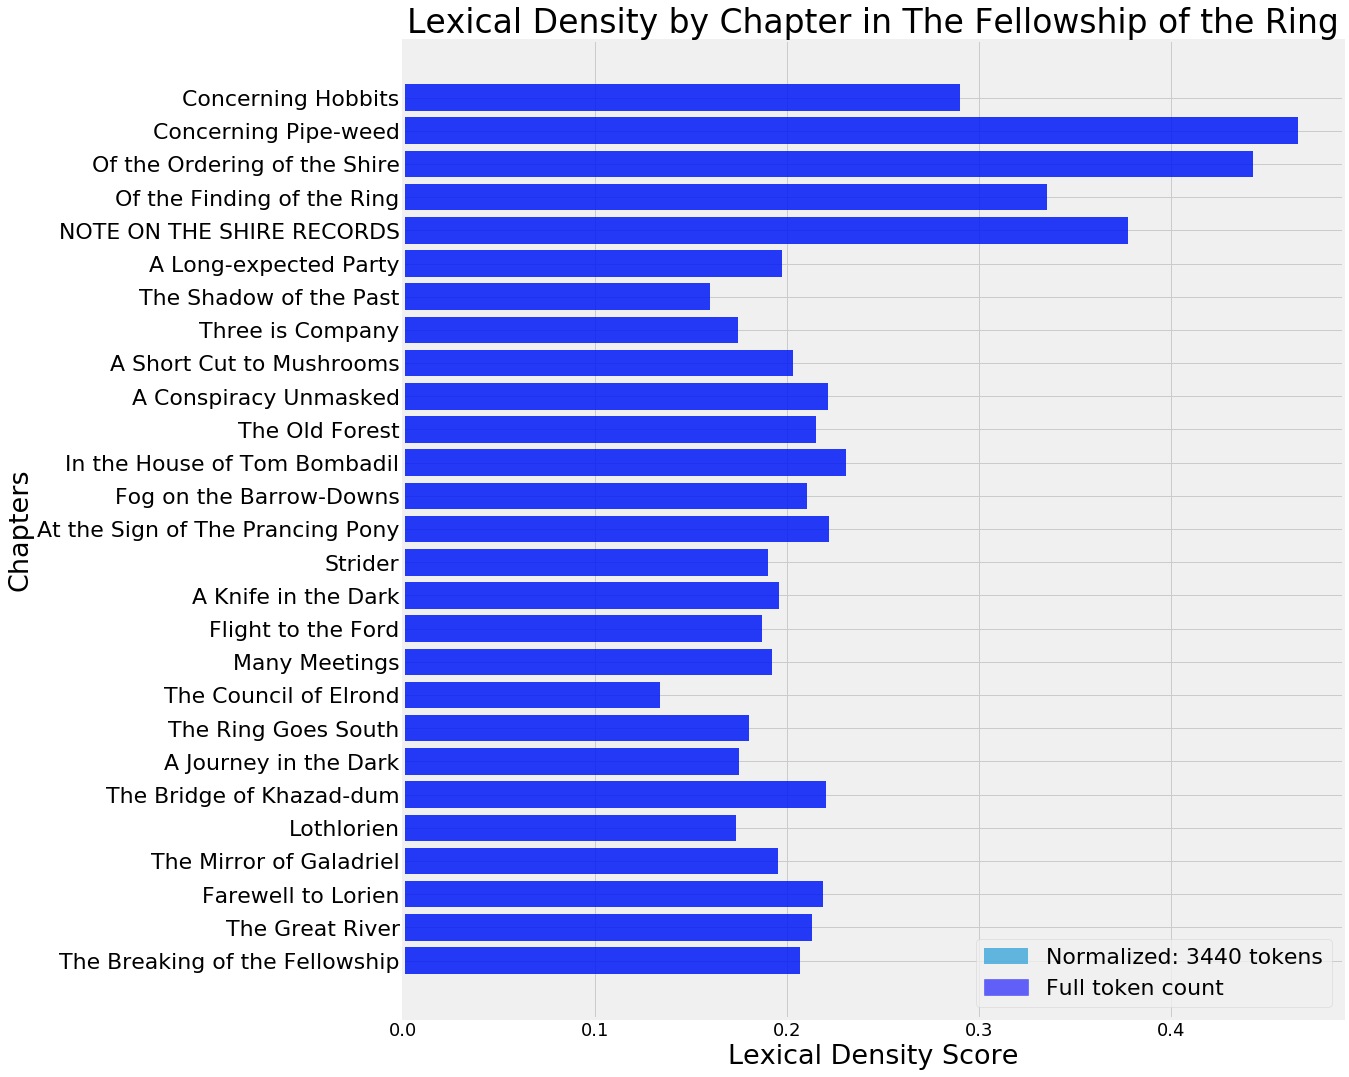

In [4]:
import matplotlib.patches as mpatches

kwargs = dict(alpha=0.6)

patch1 = mpatches.Patch(label='Normalized: 3440 tokens', **kwargs)
patch2 = mpatches.Patch(color='b', label='Full token count', **kwargs)
all_handles = (patch1, patch2)

fig, ax = plt.subplots(figsize=(15, 18))
ax.set_alpha(0.7)
ax.barh(FOTR_sentiments['Chapters'], FOTR_sentiments['Lex_density_norm'],alpha=.5)
ax.barh(FOTR_sentiments['Chapters'], FOTR_sentiments['Lex_density'],color='b',alpha=.7)
ax.set_title("Lexical Density by Chapter in The Fellowship of the Ring",fontsize=33)
ax.set_xlabel("Lexical Density Score", fontsize=27)
ax.set_ylabel("Chapters", fontsize=27)
#ax.set_xticklabels([-0.15,-0.10,-0.05,0.00,0.05,0.10,0.15,0.20,0.25],fontsize=20)
ax.set_yticklabels(FOTR_sentiments.Chapters, rotation=0, fontsize=22)
ax.legend(handles=all_handles,loc='lower right', fontsize=22)
ax.tick_params(axis='x', which='major', labelsize=18)
ax.invert_yaxis()
#plt.show()

plt.savefig(r'C:\Users\Nick\Desktop\GitProjects\NLP_projects\FOTR\FOTR_Lexical_Diversity.png',bbox_inches='tight')

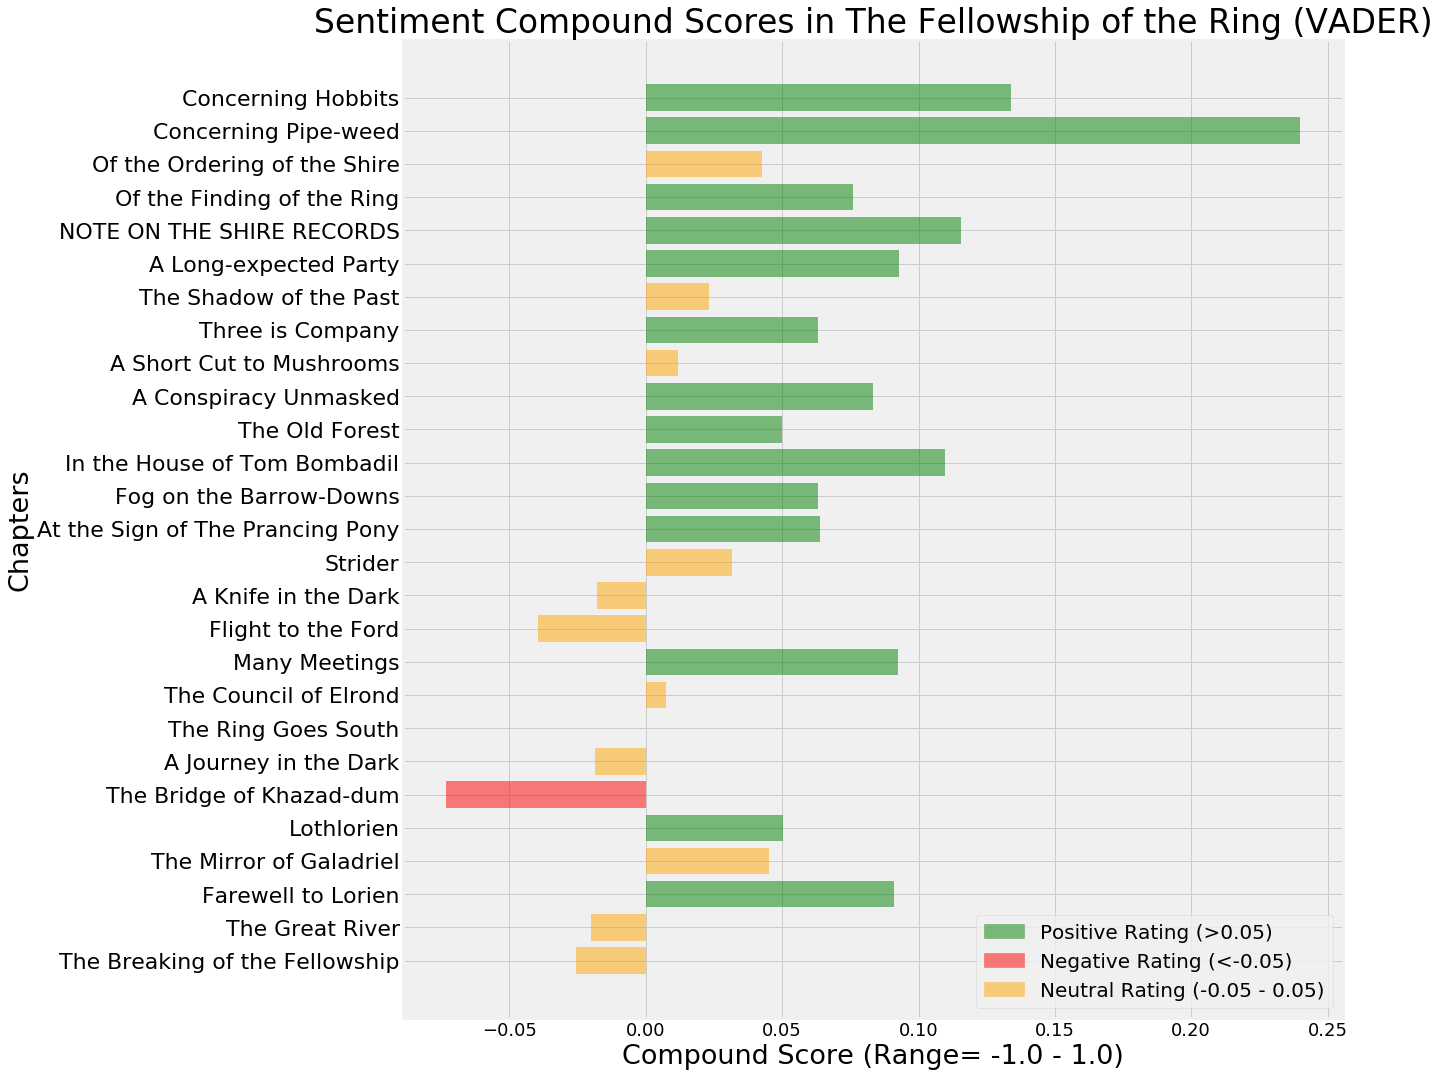

In [5]:
import matplotlib.patches as mpatches

kwargs = dict(alpha=0.5)

patch1 = mpatches.Patch(color='g', label='Positive Rating (>0.05)', **kwargs)
patch2 = mpatches.Patch(color='r', label='Negative Rating (<-0.05)', **kwargs)
patch3 = mpatches.Patch(color='orange', label='Neutral Rating (-0.05 - 0.05)', **kwargs)
all_handles = (patch1, patch2, patch3)

fig, ax = plt.subplots(figsize=(15, 18))
ax.set_alpha(0.5)
ax.barh(FOTR_sentiments['Chapters'], FOTR_sentiments['Compound'],
        color=FOTR_sentiments.Rating.map({'Positive': 'g', 'Negative': 'r', 'Neutral': 'orange'}),
        alpha=.5)
ax.set_title("Sentiment Compound Scores in The Fellowship of the Ring (VADER)",fontsize=33)
ax.set_xlabel("Compound Score (Range= -1.0 - 1.0)", fontsize=27)
ax.set_ylabel("Chapters", fontsize=27)
#ax.set_xticklabels([-0.15,-0.10,-0.05,0.00,0.05,0.10,0.15,0.20,0.25],fontsize=20)
ax.set_yticklabels(FOTR_sentiments.Chapters, rotation=0, fontsize=22)
ax.legend(handles=all_handles,loc='lower right', fontsize=20)
ax.tick_params(axis='x', which='major', labelsize=18)
ax.invert_yaxis()
#plt.show()

plt.savefig(r'C:\Users\Nick\Desktop\GitProjects\NLP_projects\FOTR\FOTR_VADER_compound.png',bbox_inches='tight')

In [28]:
print ('--- Sentiment Scores for The Fellowhip of the Ring Averaged Across Chapters without Prologue ---')
print ('\n')
print ('-- TEXT BLOB --')
print ('Polarity: {0:.3f}'.format(FOTR_sentiments_nopro['Polarity'].mean()))
print ('Subjectivity: {0:.3f}'.format(FOTR_sentiments_nopro['Subjectivity'].mean()))
print ('\n')
print ('-- VADER --')
print ('Positive: {0:.3f}'.format(FOTR_sentiments_nopro['Positive'].mean()))
print ('Negative: {0:.3f}'.format(FOTR_sentiments_nopro['Negative'].mean()))
print ('Neutral: {0:.3f}'.format(FOTR_sentiments_nopro['Neutral'].mean()))
print ('Compound: {0:.3f}'.format(FOTR_sentiments_nopro['Compound'].mean()))
print ('\n')
print ('-- NRC --')
print ('Positive: {0:.3f}'.format(FOTR_sentiments_nopro['Positive_NRC'].mean()))
print ('Joy: {0:.3f}'.format(FOTR_sentiments_nopro['Joy'].mean()))
print ('Anticipation: {0:.3f}'.format(FOTR_sentiments_nopro['Anticipation'].mean()))
print ('Surprise: {0:.3f}'.format(FOTR_sentiments_nopro['Surprise'].mean()))
print ('Trust: {0:.3f}'.format(FOTR_sentiments_nopro['Trust'].mean()))
print ('Negative: {0:.3f}'.format(FOTR_sentiments_nopro['Negative_NRC'].mean()))
print ('Anger: {0:.3f}'.format(FOTR_sentiments_nopro['Anger'].mean()))
print ('Fear: {0:.3f}'.format(FOTR_sentiments_nopro['Fear'].mean()))
print ('Disgust: {0:.3f}'.format(FOTR_sentiments_nopro['Disgust'].mean()))
print ('Sadness: {0:.3f}'.format(FOTR_sentiments_nopro['Sadness'].mean()))

--- Sentiment Scores for The Fellowhip of the Ring Averaged Across Chapters without Prologue ---


-- TEXT BLOB --
Polarity: 0.038
Subjectivity: 0.291


-- VADER --
Positive: 0.073
Negative: 0.063
Neutral: 0.864
Compound: 0.031


-- NRC --
Positive: 0.033
Joy: 0.015
Anticipation: 0.021
Surprise: 0.012
Trust: 0.021
Negative: 0.025
Anger: 0.010
Fear: 0.014
Disgust: 0.006
Sadness: 0.014


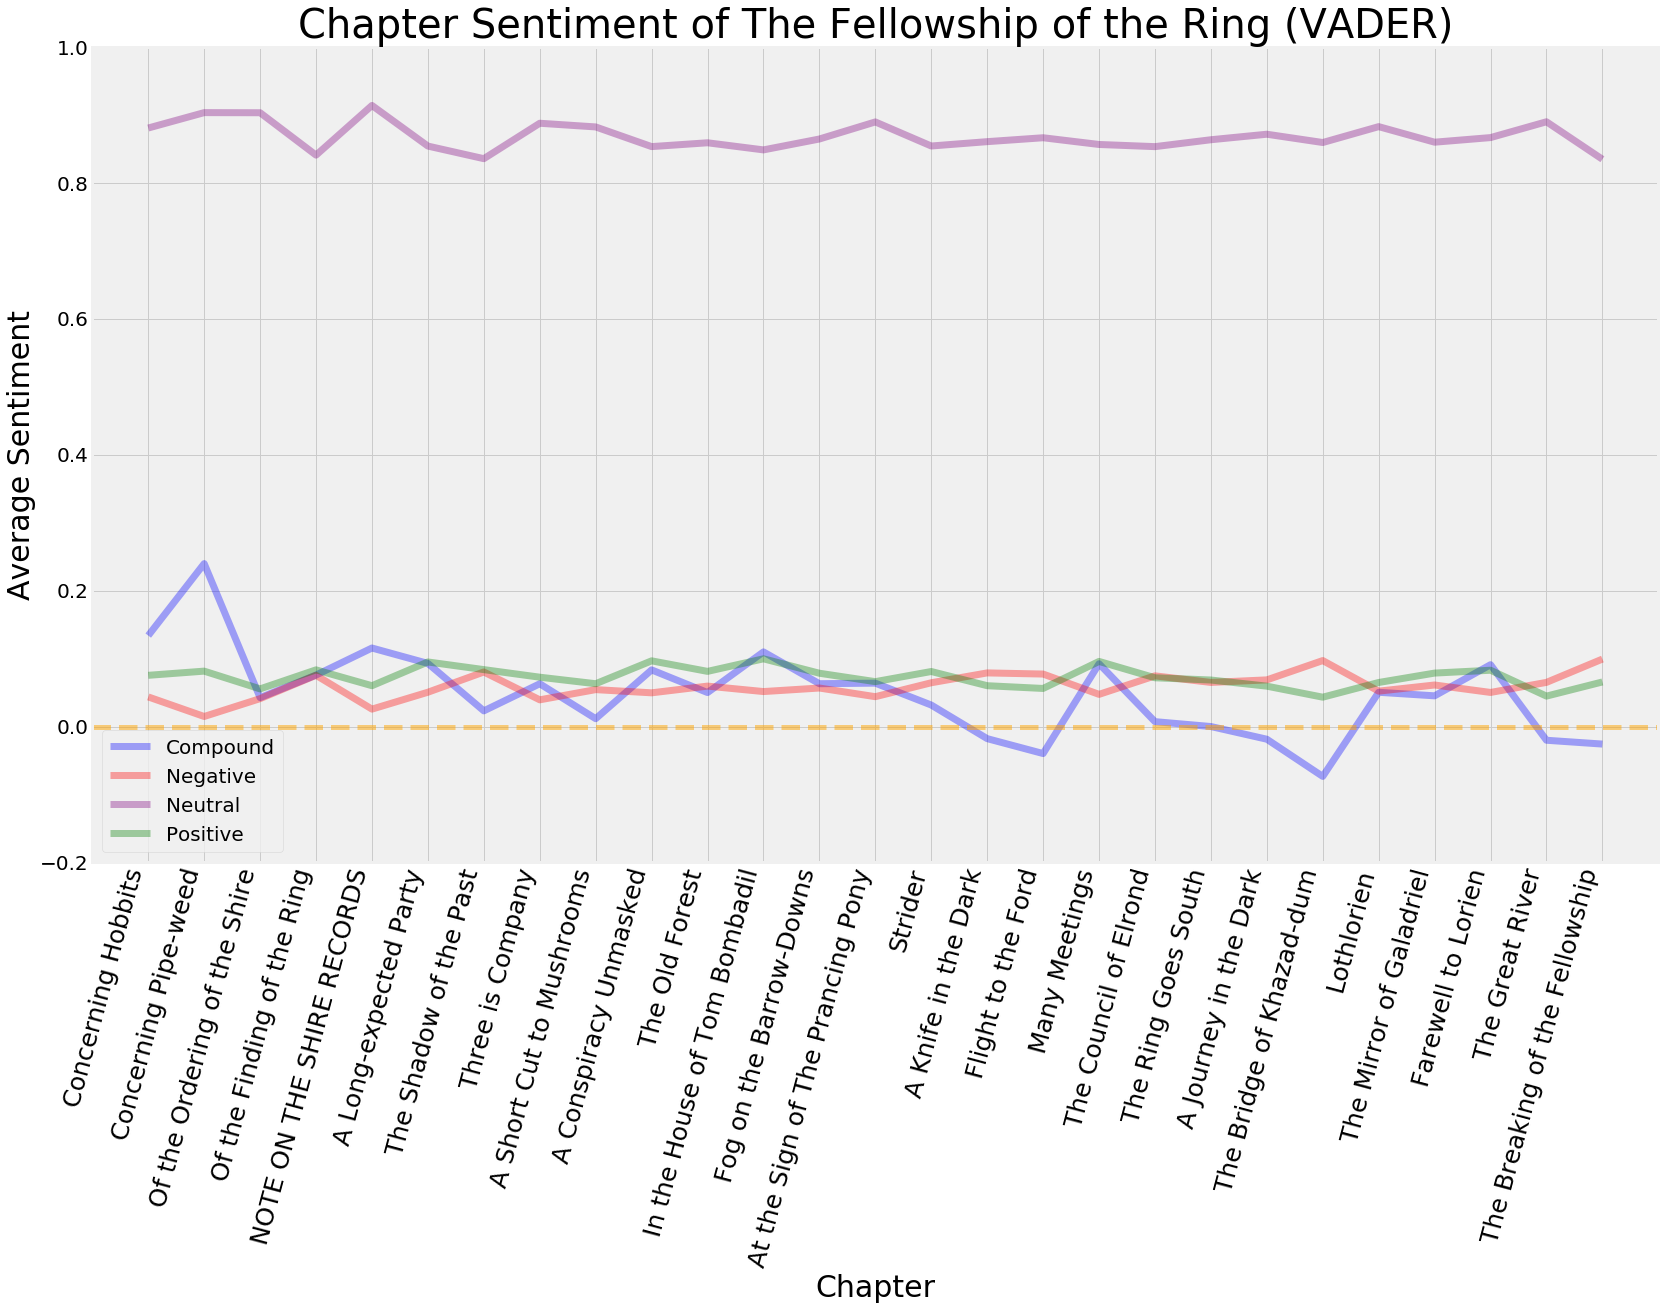

In [12]:
ax = plt.gca()
FOTR_sentiments.plot(kind='line',x='Chapters', y='Compound',figsize=(25,15), color='blue',
                             alpha=.35, linewidth=7, ax=ax)
FOTR_sentiments.plot(kind='line',x='Chapters', y='Negative',figsize=(25,15), color='red',
                             alpha=.35, linewidth=7, ax=ax)
FOTR_sentiments.plot(kind='line',x='Chapters', y='Neutral',figsize=(25,15), color='purple',
                             alpha=.35, linewidth=7, ax=ax)
FOTR_sentiments.plot(kind='line',x='Chapters', y='Positive',figsize=(25,15), color='green',
                             alpha=.35, linewidth=7, ax=ax)
plt.axhline(y=0, xmin=0, xmax=1, alpha=.5, color='orange', linestyle='--', linewidth=5)
plt.legend(loc='best', fontsize=20)
plt.title('Chapter Sentiment of The Fellowship of the Ring (VADER)', fontsize=40)
plt.xlim(-1,27)
plt.ylim(-.2,1)
plt.xlabel('Chapter', fontsize=30)
plt.xticks(np.arange(27), FOTR_sentiments.Chapters[0:27], rotation=75, ha='right',fontsize=25)
plt.yticks([-0.2,0,0.2,0.4,0.6,0.8,1.0],fontsize=20)
plt.ylabel('Average Sentiment', fontsize=30)
#plt.show()

plt.savefig(r'C:\Users\Nick\Desktop\GitProjects\NLP_projects\FOTR\FOTR_VADER_full.png',bbox_inches='tight')

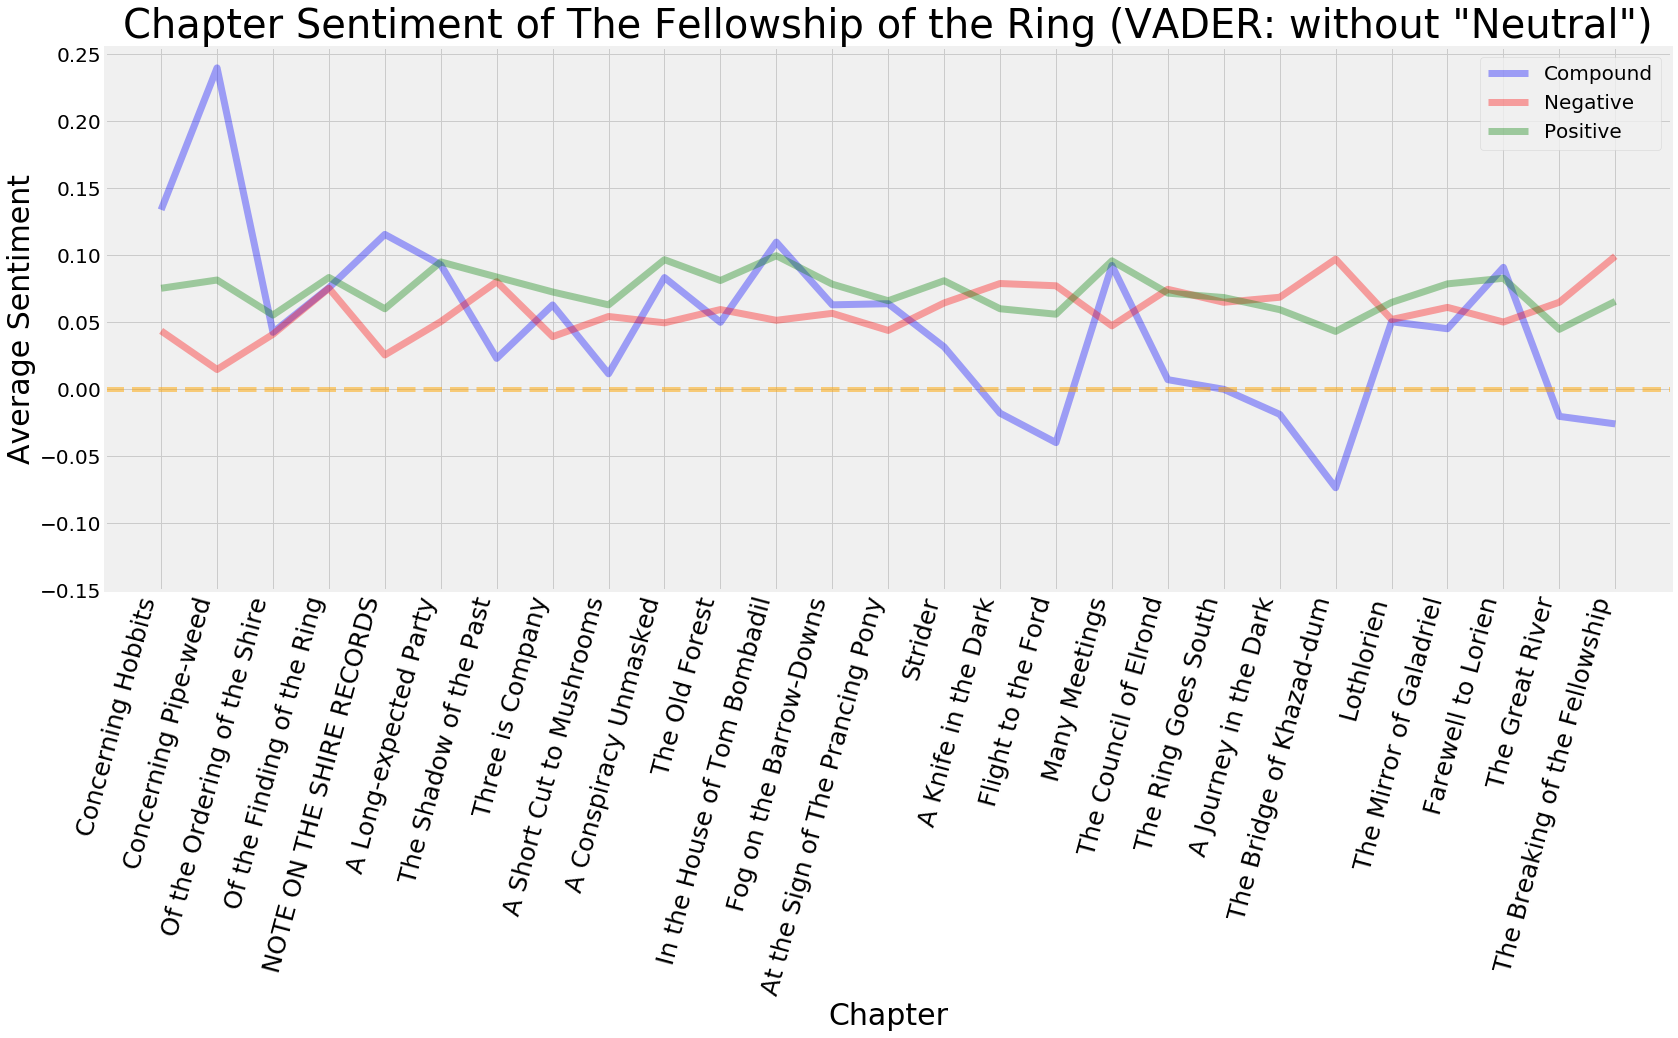

In [29]:
ax1 = plt.gca()
FOTR_sentiments.plot(kind='line',x='Chapters', y='Compound',figsize=(25,10), color='blue',
                             alpha=.35, linewidth=7, ax=ax1)
FOTR_sentiments.plot(kind='line',x='Chapters', y='Negative',figsize=(25,10), color='red',
                             alpha=.35, linewidth=7, ax=ax1)
FOTR_sentiments.plot(kind='line',x='Chapters', y='Positive',figsize=(25,10), color='green',
                             alpha=.35, linewidth=7, ax=ax1)
plt.axhline(y=0, xmin=0, xmax=1, alpha=.5, color='orange', linestyle='--', linewidth=5)
plt.legend(loc='best', fontsize=20)
plt.title('Chapter Sentiment of The Fellowship of the Ring (VADER: without "Neutral")', fontsize=40)
plt.xlim(-1,27)
#plt.ylim(-.5,1)
plt.xlabel('Chapter', fontsize=30)
plt.xticks(np.arange(27), FOTR_sentiments.Chapters[0:27], rotation=75, ha='right',fontsize=25)
plt.yticks([-0.15,-0.10,-0.05,0,0.05,0.10,0.15,0.20,0.25],fontsize=20)
plt.ylabel('Average Sentiment', fontsize=30)
#plt.show()

plt.savefig(r'C:\Users\Nick\Desktop\GitProjects\NLP_projects\FOTR\FOTR_VADER_zoom.png',bbox_inches='tight')

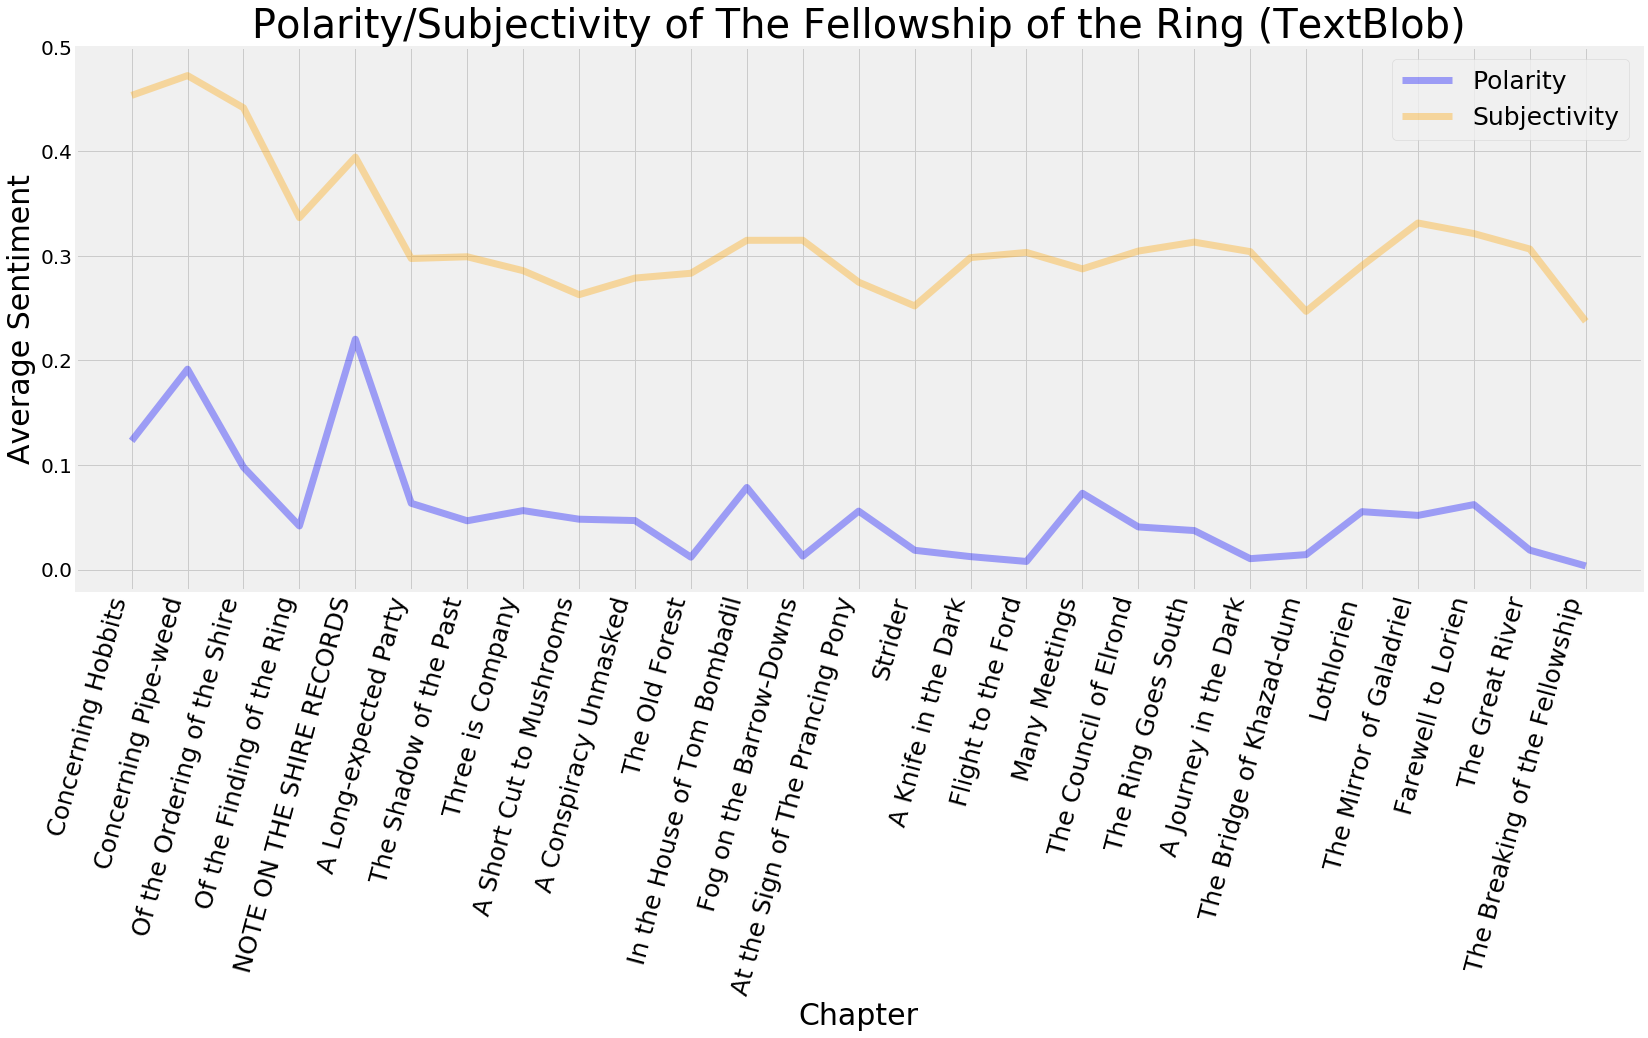

In [14]:
ax2 = plt.gca()
FOTR_sentiments.plot(kind='line',x='Chapters', y='Polarity',figsize=(25,10), color='blue',
                             alpha=.35,linewidth=7, ax=ax2)
FOTR_sentiments.plot(kind='line',x='Chapters', y='Subjectivity',figsize=(25,10), color='orange', 
                             alpha=.35, linewidth=7, ax=ax2)
plt.legend(loc='best', fontsize=25)
plt.title('Polarity/Subjectivity of The Fellowship of the Ring (TextBlob)', fontsize=40)
plt.xlim(-1,27)
#plt.ylim(-.5,1)
plt.xlabel('Chapter', fontsize=30)
plt.xticks(np.arange(27), FOTR_sentiments.Chapters[0:27], rotation=75, ha='right',fontsize=25)
plt.yticks([0,0.1,0.2,0.3,0.4,0.5],fontsize=20)
plt.ylabel('Average Sentiment', fontsize=30)
#plt.show()

plt.savefig(r'C:\Users\Nick\Desktop\GitProjects\NLP_projects\FOTR\FOTR_TextBlob_polarity.png',bbox_inches='tight')

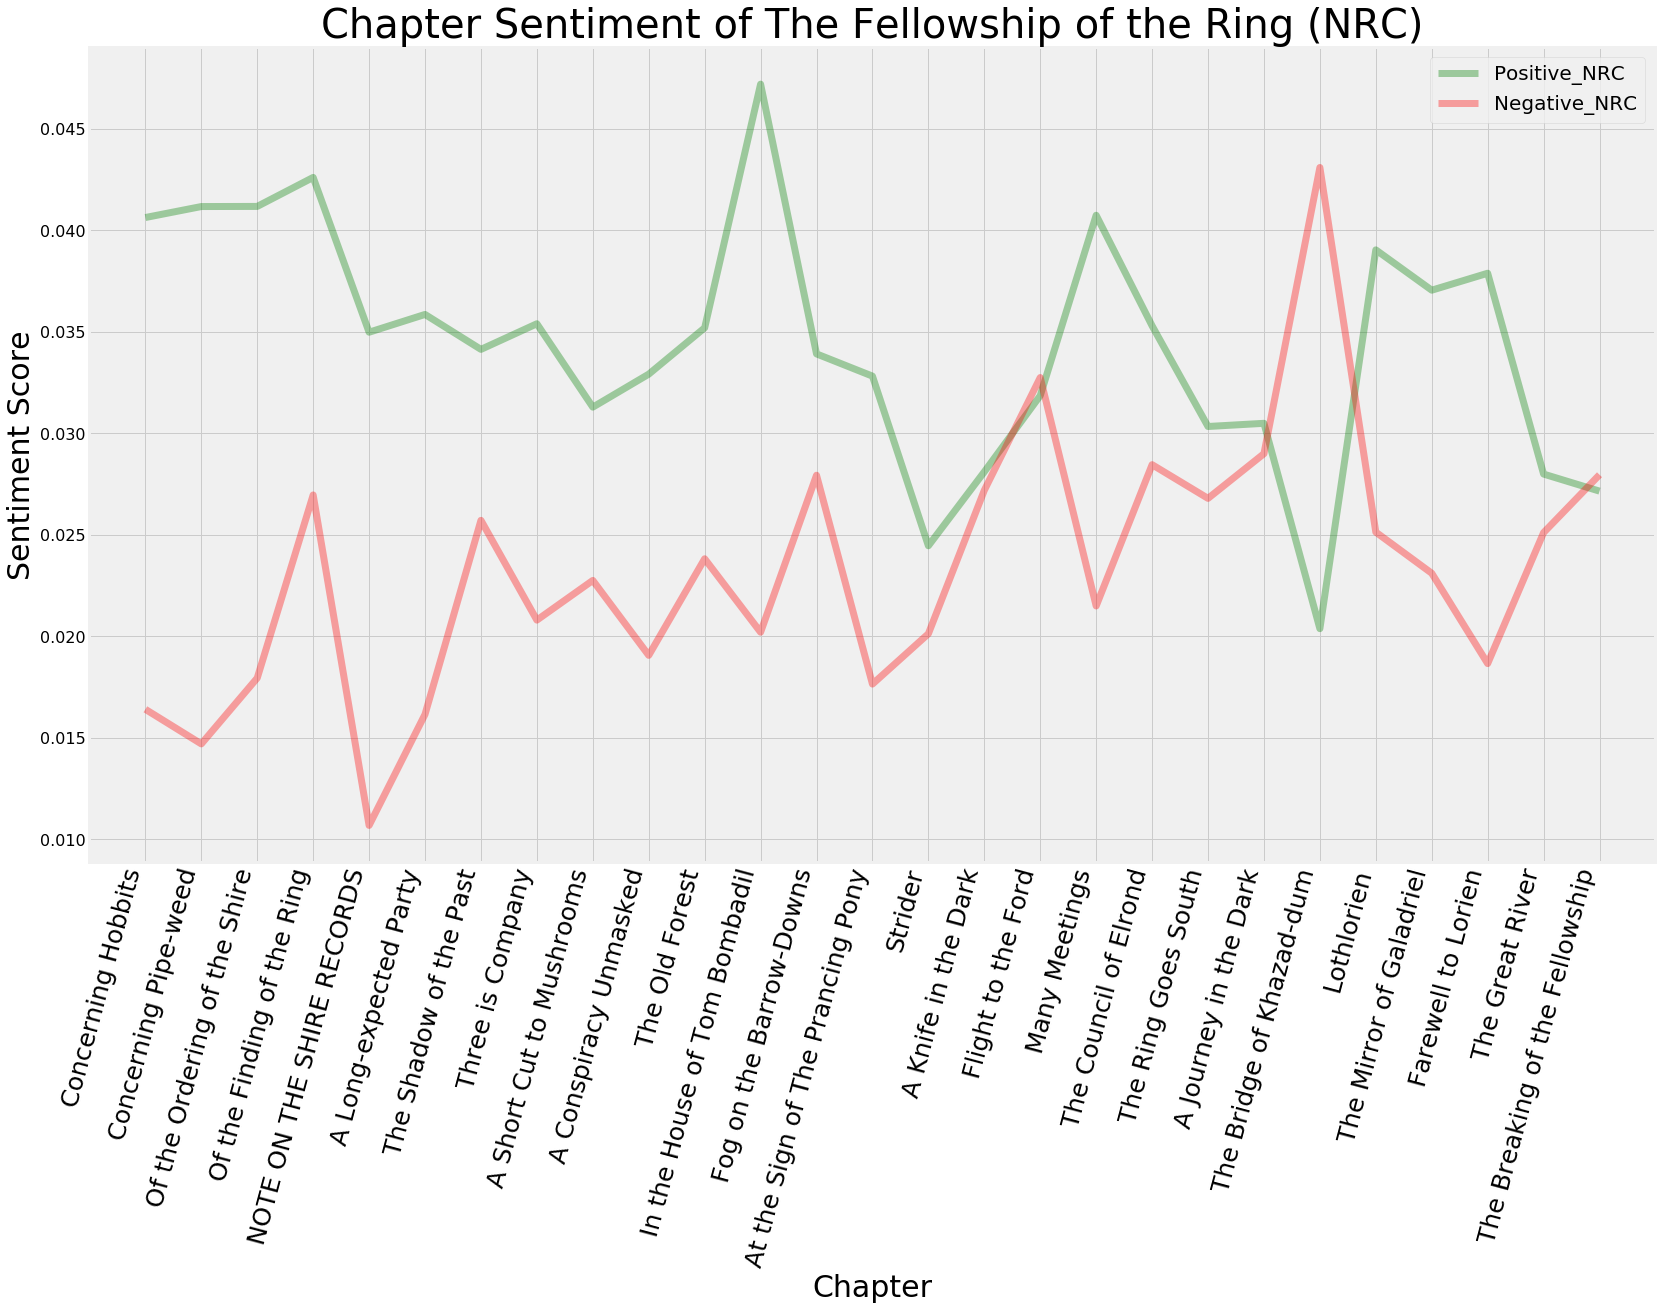

In [15]:
ax = plt.gca()
FOTR_sentiments.plot(kind='line',x='Chapters', y='Positive_NRC',figsize=(25,15), color='green',
                             alpha=.35, linewidth=7, ax=ax)
FOTR_sentiments.plot(kind='line',x='Chapters', y='Negative_NRC',figsize=(25,15), color='red',
                             alpha=.35, linewidth=7, ax=ax)
plt.legend(loc='best', fontsize=20)
plt.title('Chapter Sentiment of The Fellowship of the Ring (NRC)', fontsize=40)
plt.xlim(-1,27)
#plt.ylim(-.2,1)
plt.xlabel('Chapter', fontsize=30)
plt.xticks(np.arange(27), FOTR_sentiments.Chapters[0:27], rotation=75, ha='right',fontsize=25)
plt.yticks(fontsize=16)
plt.ylabel('Sentiment Score', fontsize=30)
#plt.show()

plt.savefig(r'C:\Users\Nick\Desktop\GitProjects\NLP_projects\FOTR\FOTR_NRC_PosNeg.png',bbox_inches='tight')

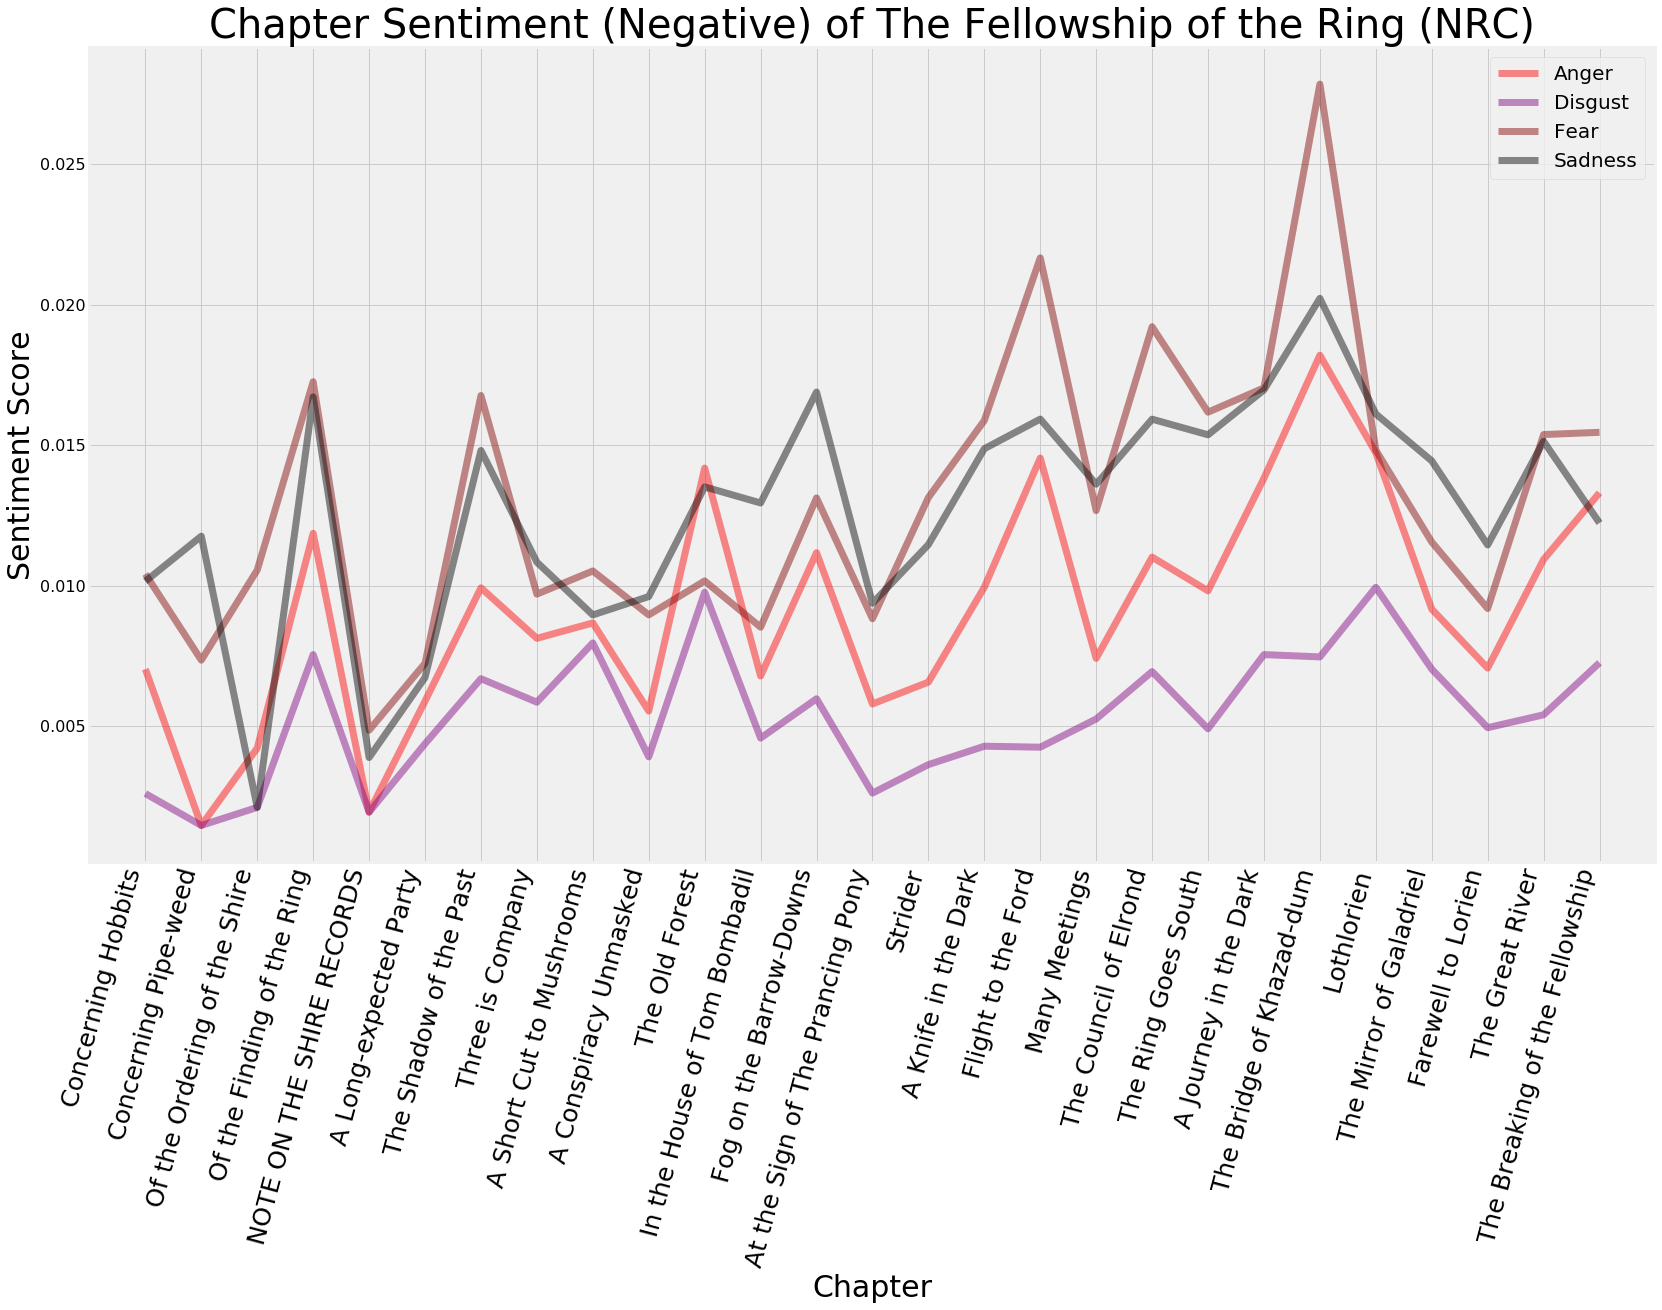

In [16]:
ax = plt.gca()
FOTR_sentiments.plot(kind='line',x='Chapters', y='Anger',figsize=(25,15), color='red',
                             alpha=.45, linewidth=7, ax=ax)
FOTR_sentiments.plot(kind='line',x='Chapters', y='Disgust',figsize=(25,15), color='purple',
                             alpha=.45, linewidth=7, ax=ax)
FOTR_sentiments.plot(kind='line',x='Chapters', y='Fear',figsize=(25,15), color='maroon',
                             alpha=.45, linewidth=7, ax=ax)
FOTR_sentiments.plot(kind='line',x='Chapters', y='Sadness',figsize=(25,15), color='black',
                             alpha=.45, linewidth=7, ax=ax)
plt.legend(loc='best', fontsize=20)
plt.title('Chapter Sentiment (Negative) of The Fellowship of the Ring (NRC)', fontsize=40)
plt.xlim(-1,27)
#plt.ylim(-.2,1)
plt.xlabel('Chapter', fontsize=30)
plt.xticks(np.arange(27), FOTR_sentiments.Chapters[0:27], rotation=75, ha='right',fontsize=25)
plt.yticks(fontsize=16)
plt.ylabel('Sentiment Score', fontsize=30)
#plt.show()

plt.savefig(r'C:\Users\Nick\Desktop\GitProjects\NLP_projects\FOTR\FOTR_NRC_Neg.png',bbox_inches='tight')

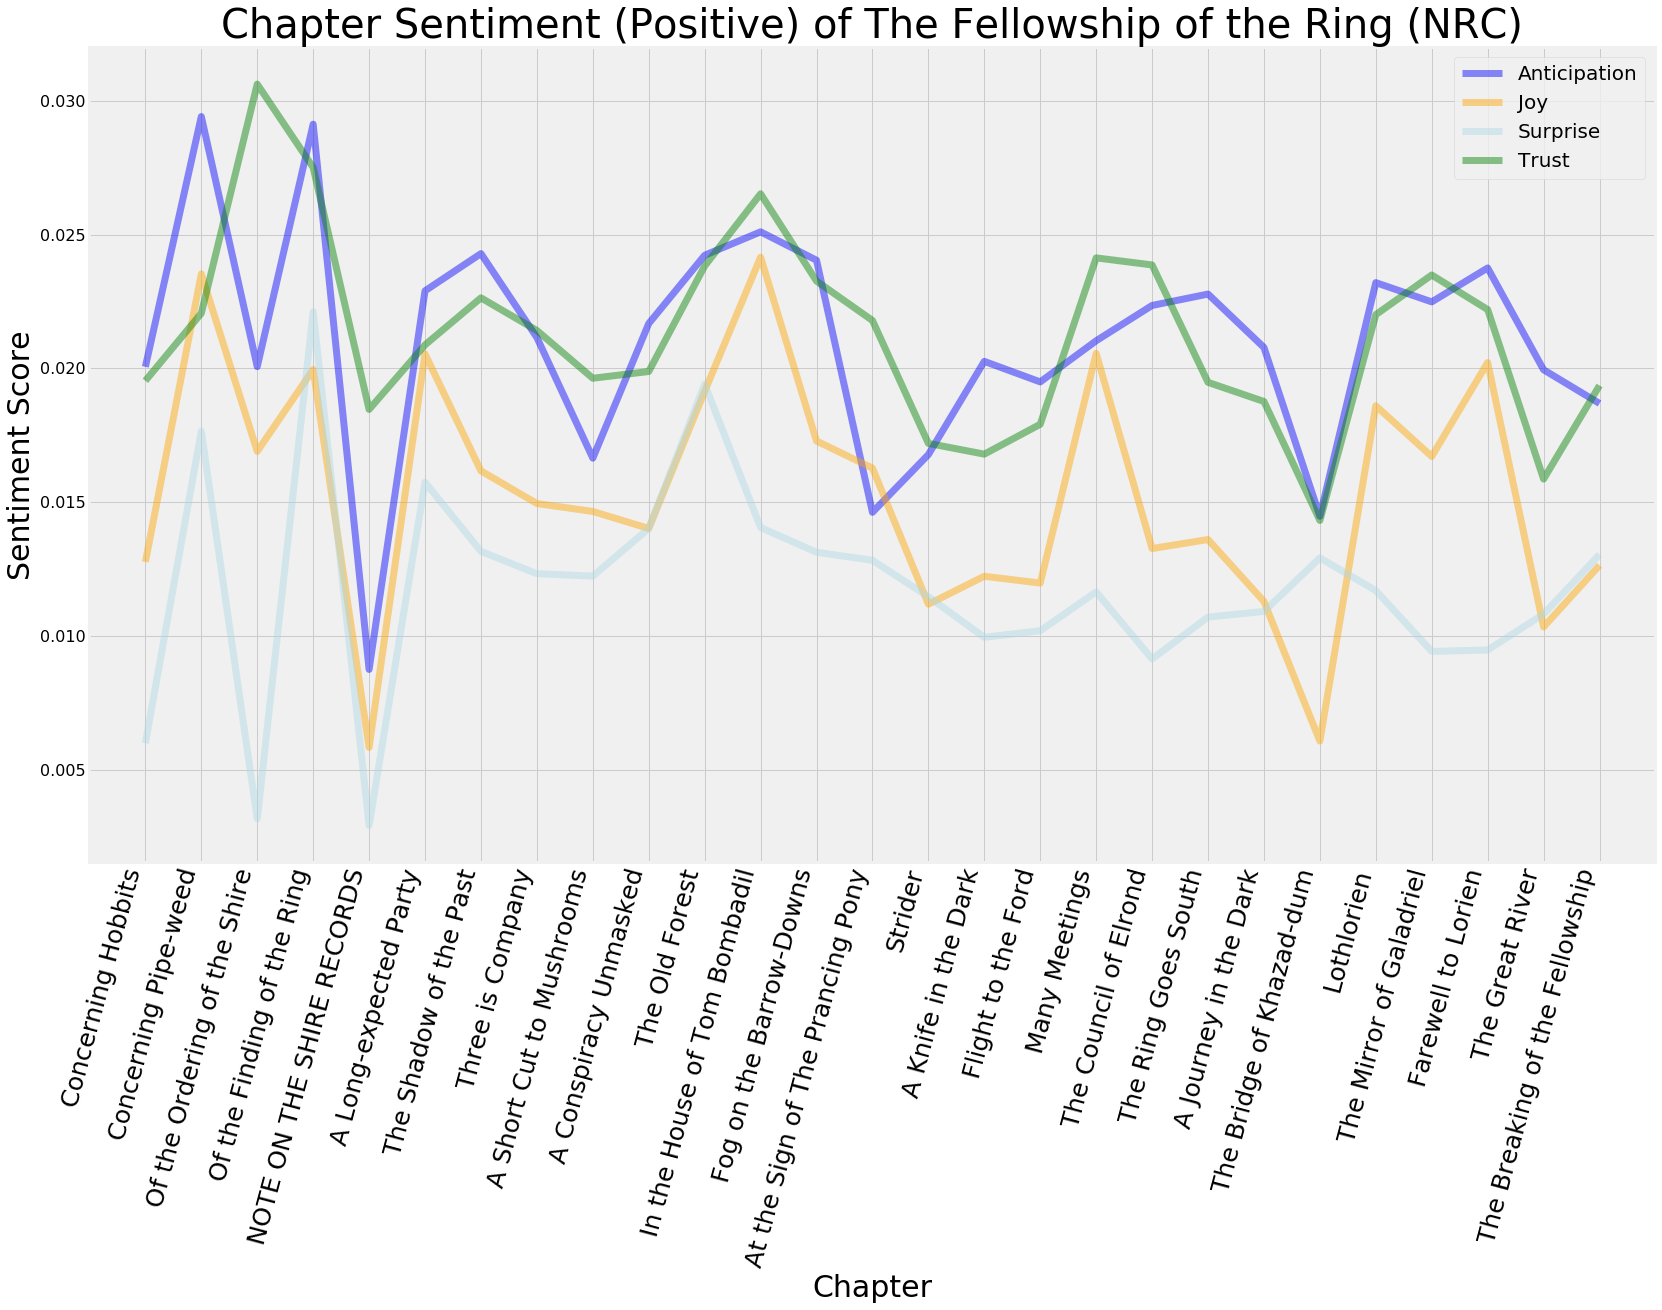

In [17]:
ax = plt.gca()
FOTR_sentiments.plot(kind='line',x='Chapters', y='Anticipation',figsize=(25,15), color='blue',
                             alpha=.45, linewidth=7, ax=ax)
FOTR_sentiments.plot(kind='line',x='Chapters', y='Joy',figsize=(25,15), color='orange',
                             alpha=.45, linewidth=7, ax=ax)
FOTR_sentiments.plot(kind='line',x='Chapters', y='Surprise',figsize=(25,15), color='lightblue',
                             alpha=.45, linewidth=7, ax=ax)
FOTR_sentiments.plot(kind='line',x='Chapters', y='Trust',figsize=(25,15), color='green',
                             alpha=.45, linewidth=7, ax=ax)
plt.legend(loc='best', fontsize=20)
plt.title('Chapter Sentiment (Positive) of The Fellowship of the Ring (NRC)', fontsize=40)
plt.xlim(-1,27)
#plt.ylim(-.2,1)
plt.xlabel('Chapter', fontsize=30)
plt.xticks(np.arange(27), FOTR_sentiments.Chapters[0:27], rotation=75, ha='right',fontsize=25)
plt.yticks(fontsize=16)
plt.ylabel('Sentiment Score', fontsize=30)
#plt.show()

plt.savefig(r'C:\Users\Nick\Desktop\GitProjects\NLP_projects\FOTR\FOTR_NRC_Pos.png',bbox_inches='tight')

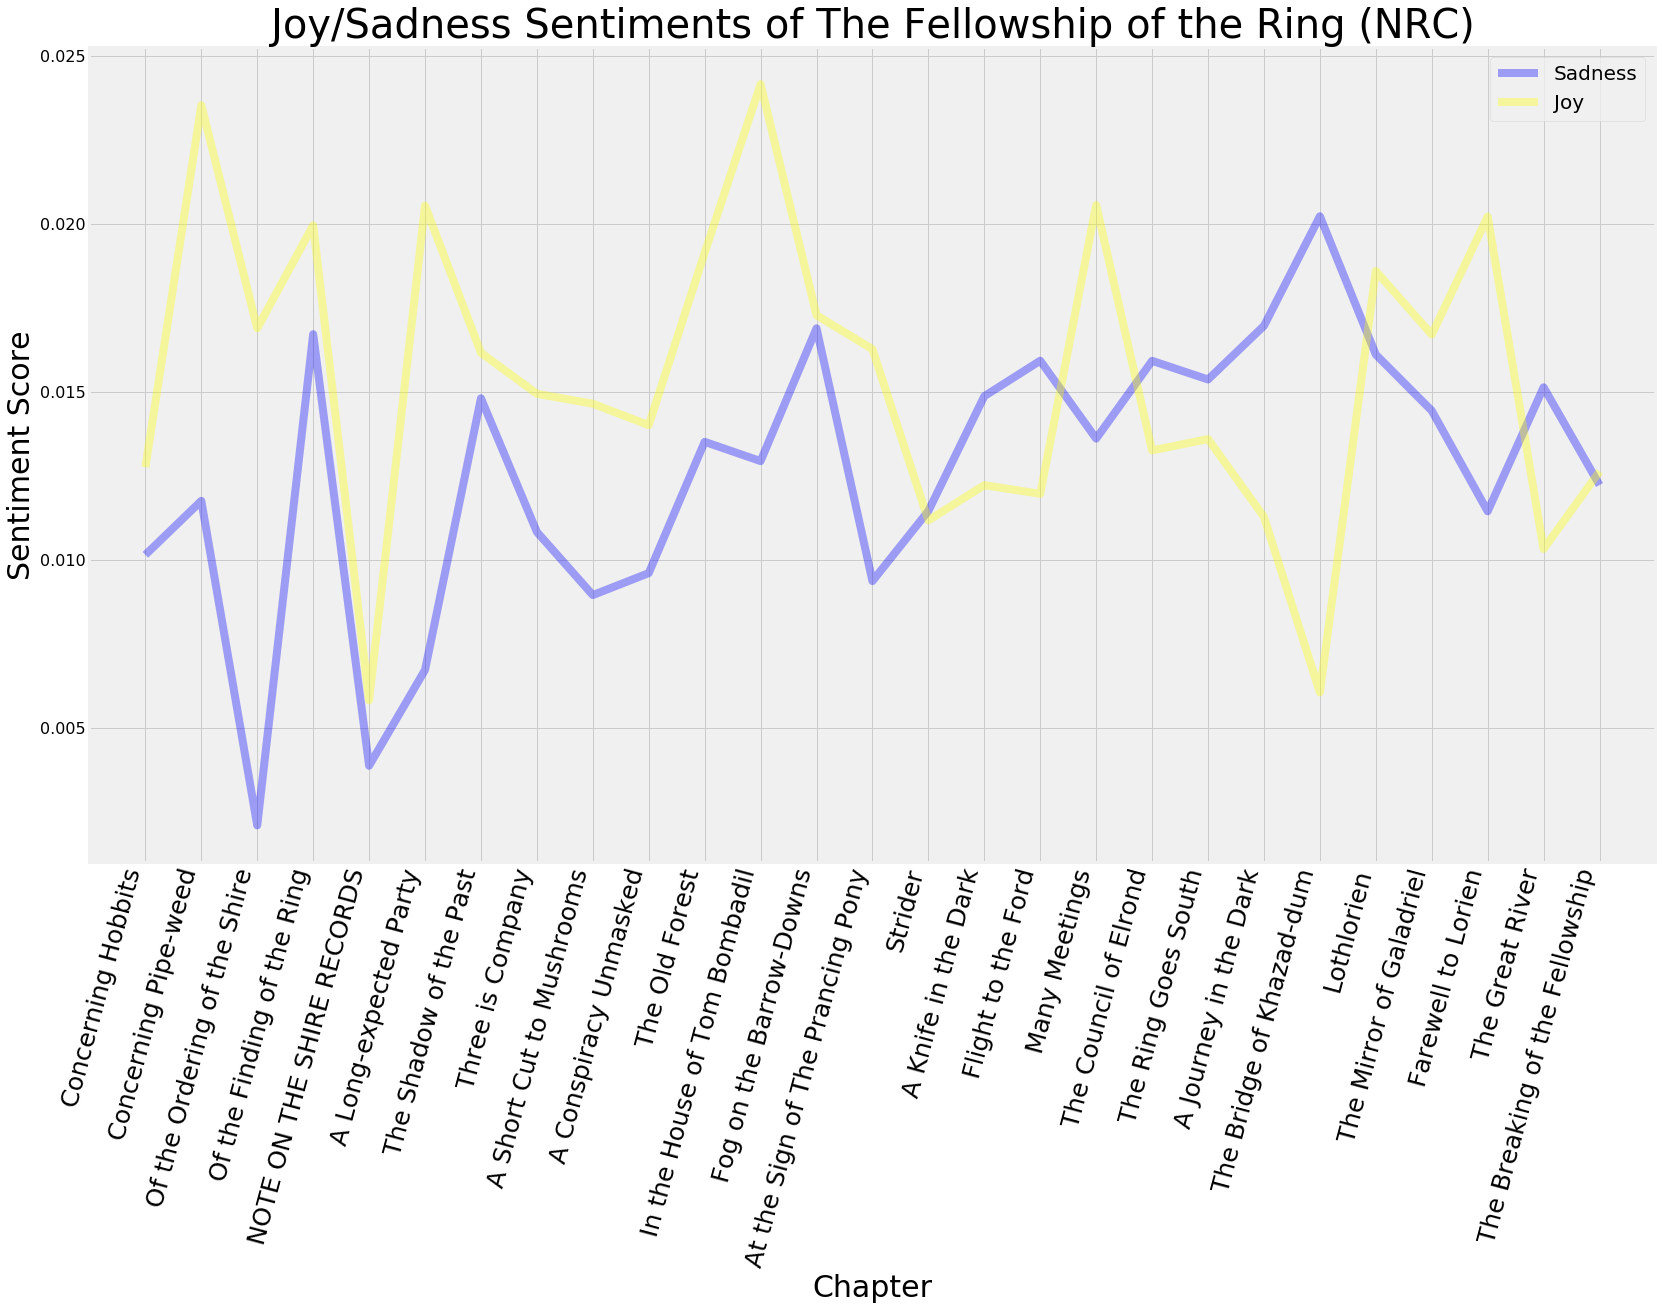

In [18]:
ax = plt.gca()
FOTR_sentiments.plot(kind='line',x='Chapters', y='Sadness',figsize=(25,15), color='blue',
                             alpha=.35, linewidth=8, ax=ax)
FOTR_sentiments.plot(kind='line',x='Chapters', y='Joy',figsize=(25,15), color='yellow',
                             alpha=.35, linewidth=8, ax=ax)
plt.legend(loc='best', fontsize=20)
plt.title('Joy/Sadness Sentiments of The Fellowship of the Ring (NRC)', fontsize=40)
plt.xlim(-1,27)
#plt.ylim(-.2,1)
plt.xlabel('Chapter', fontsize=30)
plt.xticks(np.arange(27), FOTR_sentiments.Chapters[0:27], rotation=75, ha='right',fontsize=25)
plt.yticks(fontsize=16)
plt.ylabel('Sentiment Score', fontsize=30)
#plt.show()

plt.savefig(r'C:\Users\Nick\Desktop\GitProjects\NLP_projects\FOTR\FOTR_NRC_JoySad.png',bbox_inches='tight')

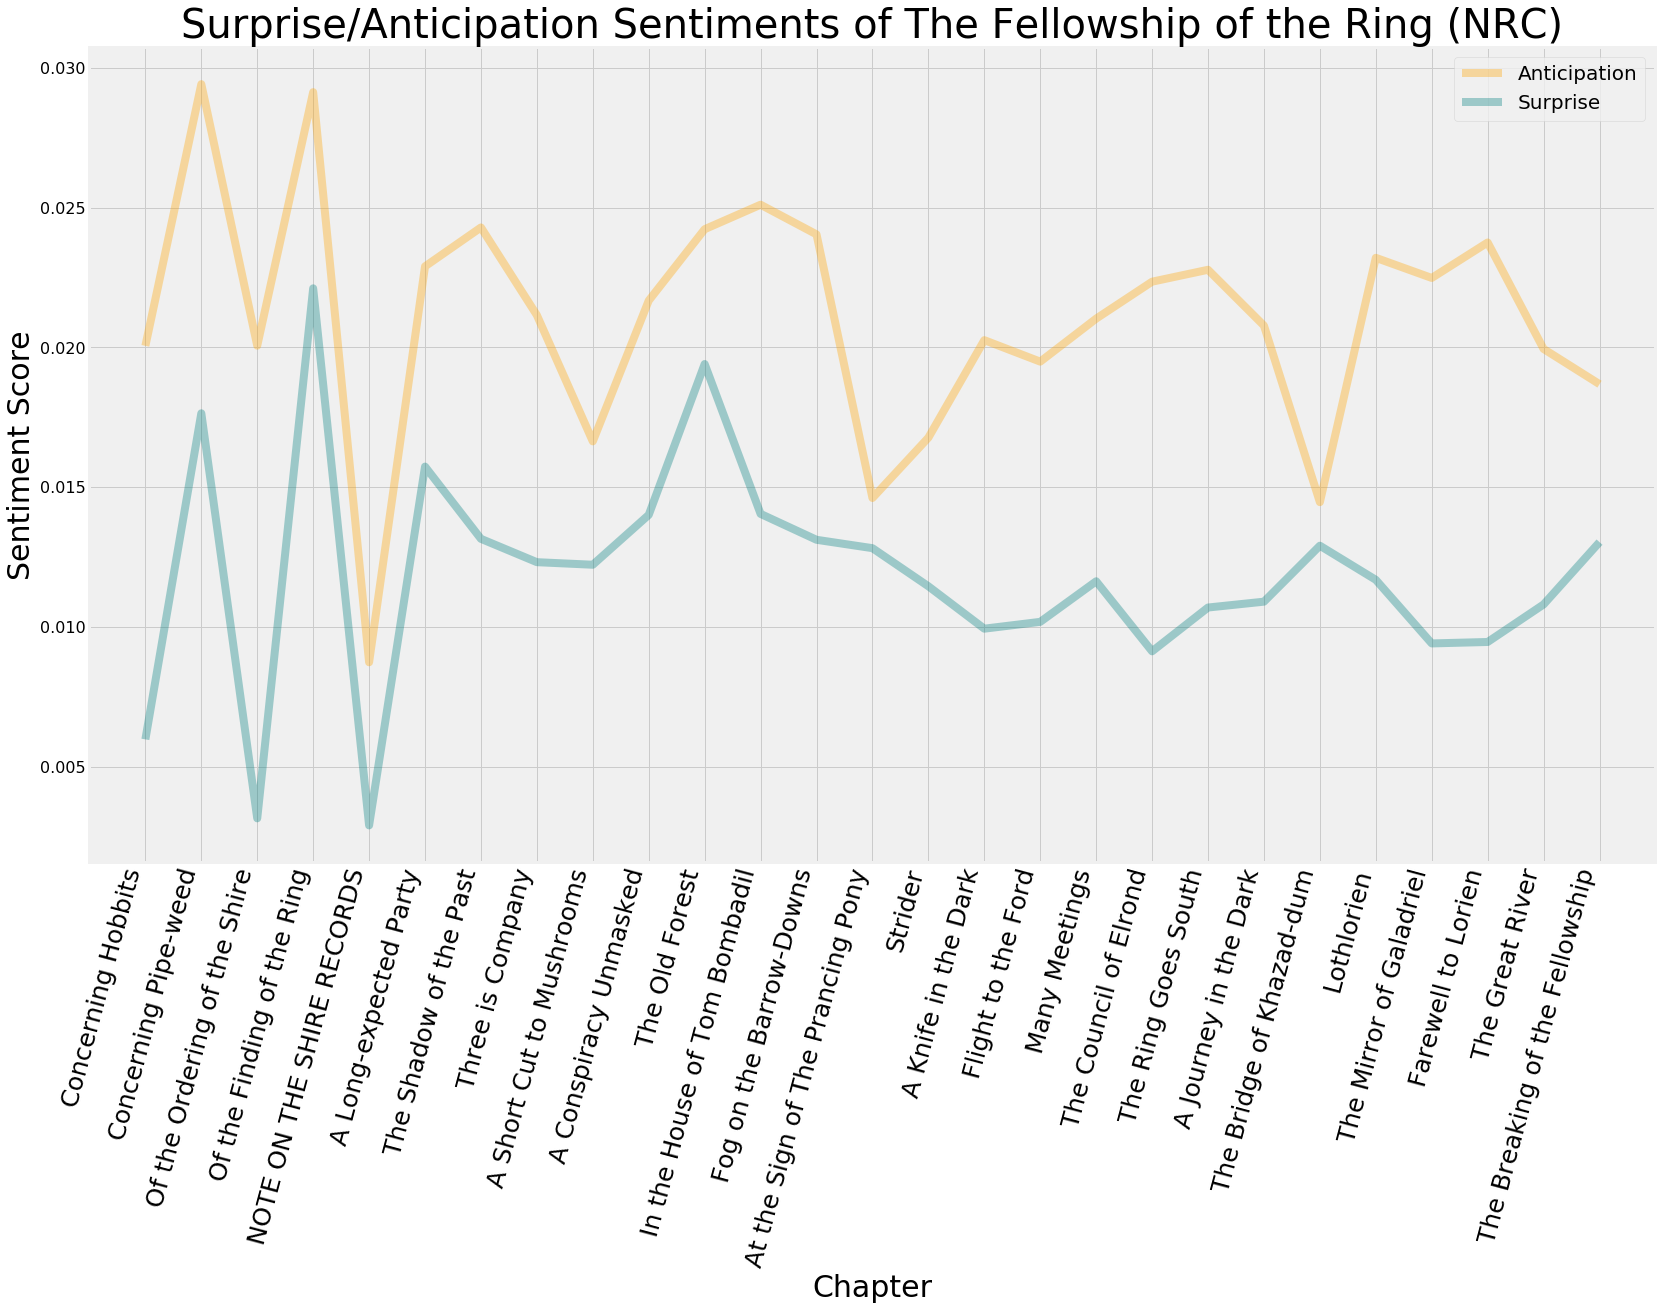

In [19]:
ax = plt.gca()
FOTR_sentiments.plot(kind='line',x='Chapters', y='Anticipation',figsize=(25,15), color='orange',
                             alpha=.35, linewidth=8, ax=ax)
FOTR_sentiments.plot(kind='line',x='Chapters', y='Surprise',figsize=(25,15), color='teal',
                             alpha=.35, linewidth=8, ax=ax)
plt.legend(loc='best', fontsize=20)
plt.title('Surprise/Anticipation Sentiments of The Fellowship of the Ring (NRC)', fontsize=40)
plt.xlim(-1,27)
#plt.ylim(-.2,1)
plt.xlabel('Chapter', fontsize=30)
plt.xticks(np.arange(27), FOTR_sentiments.Chapters[0:27], rotation=75, ha='right',fontsize=25)
plt.yticks(fontsize=16)
plt.ylabel('Sentiment Score', fontsize=30)
#plt.show()

plt.savefig(r'C:\Users\Nick\Desktop\GitProjects\NLP_projects\FOTR\FOTR_NRC_SurAnt.png',bbox_inches='tight')

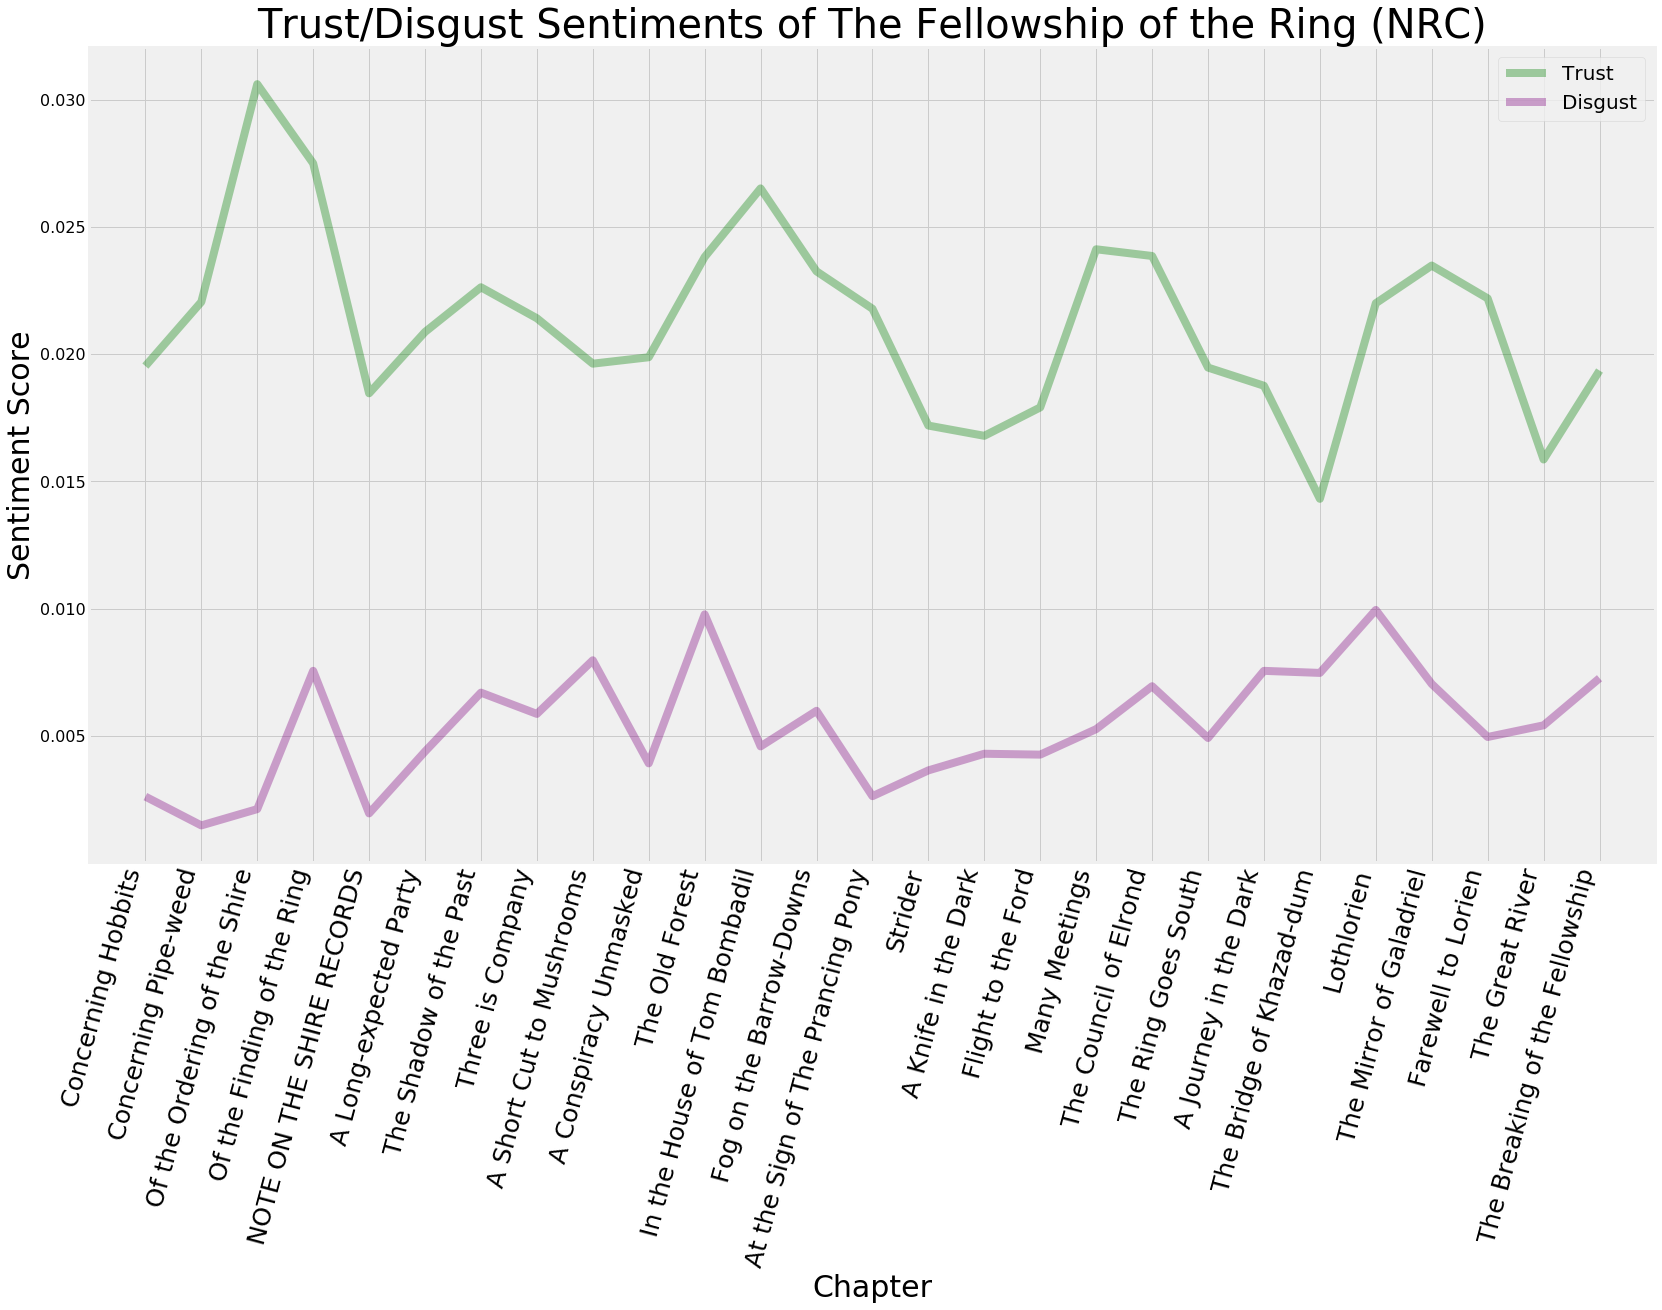

In [20]:
ax = plt.gca()
FOTR_sentiments.plot(kind='line',x='Chapters', y='Trust',figsize=(25,15), color='green',
                             alpha=.35, linewidth=8, ax=ax)
FOTR_sentiments.plot(kind='line',x='Chapters', y='Disgust',figsize=(25,15), color='purple',
                             alpha=.35, linewidth=8, ax=ax)
plt.legend(loc='best', fontsize=20)
plt.title('Trust/Disgust Sentiments of The Fellowship of the Ring (NRC)', fontsize=40)
plt.xlim(-1,27)
#plt.ylim(-.2,1)
plt.xlabel('Chapter', fontsize=30)
plt.xticks(np.arange(27), FOTR_sentiments.Chapters[0:27], rotation=75, ha='right',fontsize=25)
plt.yticks(fontsize=16)
plt.ylabel('Sentiment Score', fontsize=30)
#plt.show()

plt.savefig(r'C:\Users\Nick\Desktop\GitProjects\NLP_projects\FOTR\FOTR_NRC_TrustDis.png',bbox_inches='tight')

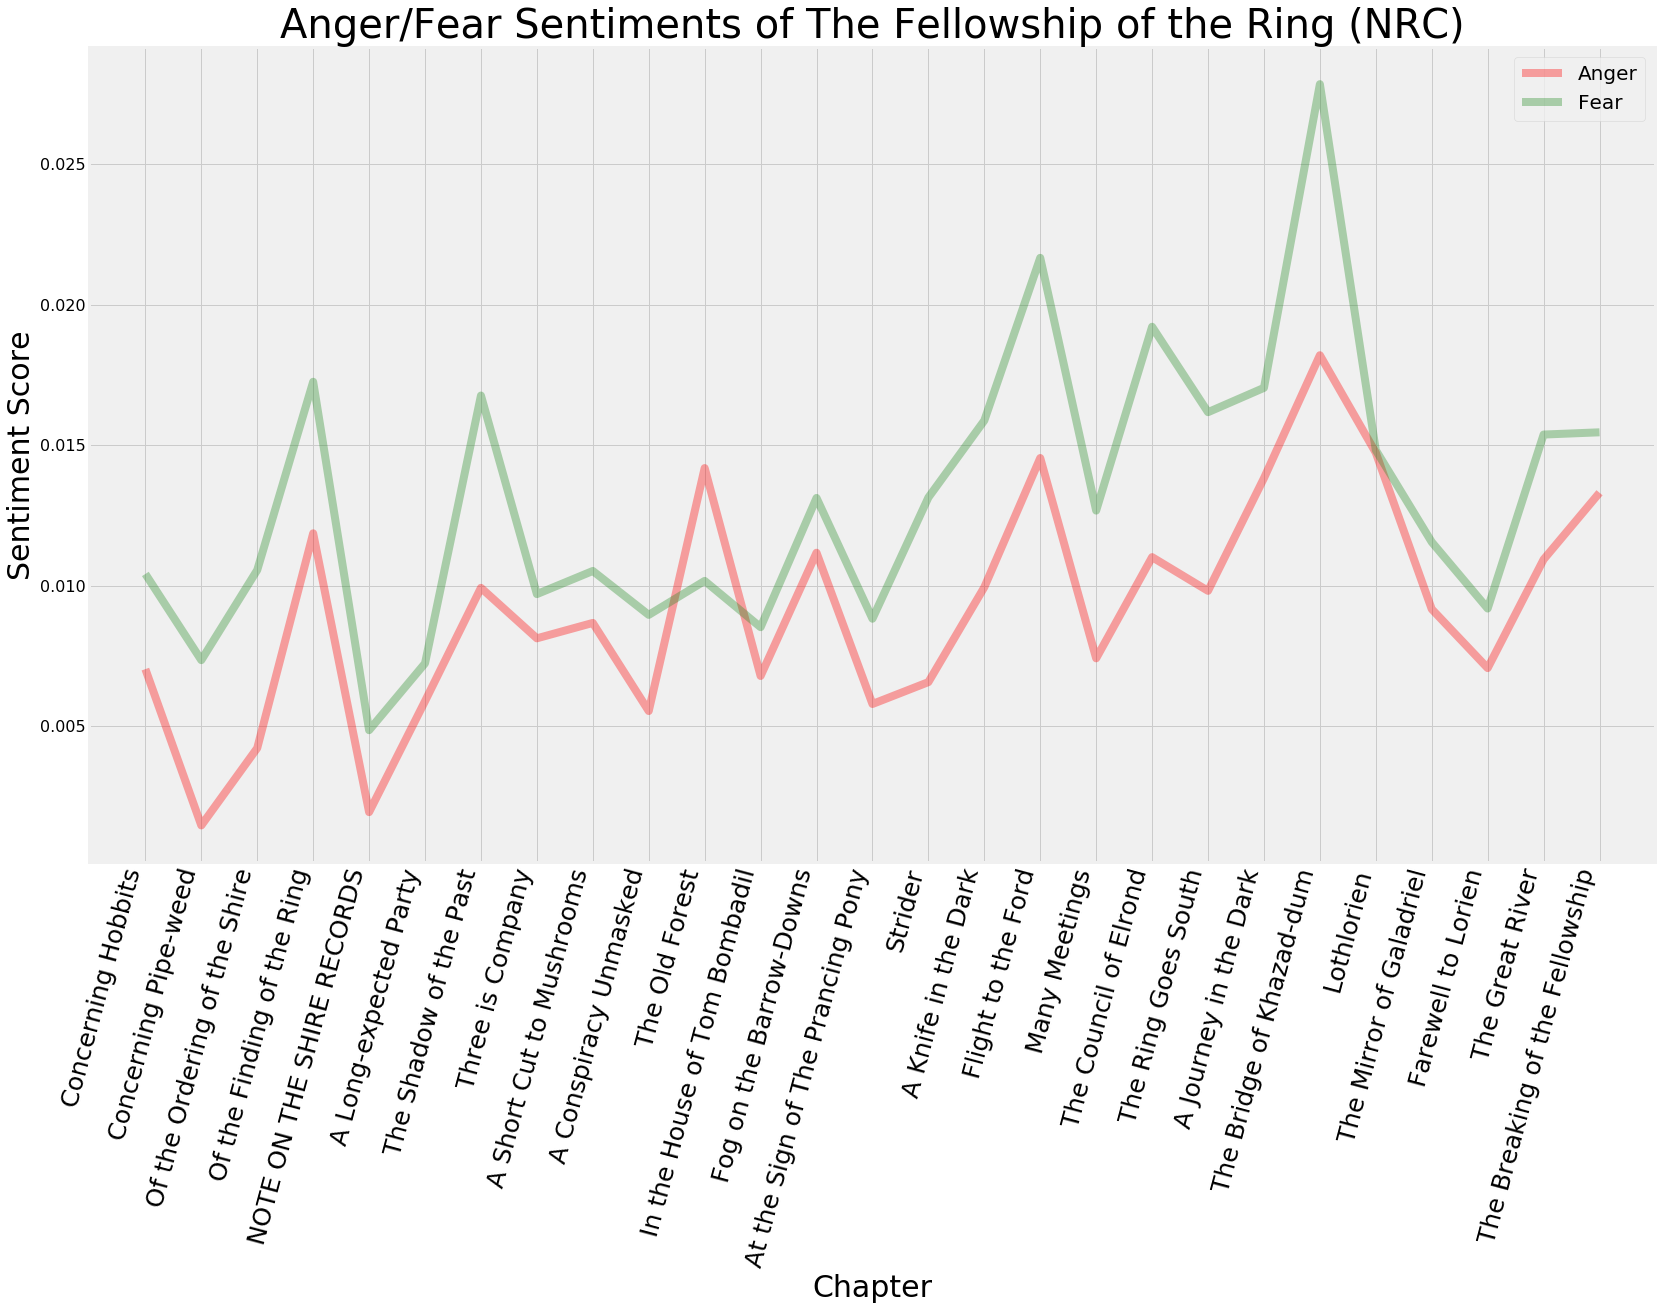

In [21]:
ax = plt.gca()
FOTR_sentiments.plot(kind='line',x='Chapters', y='Anger',figsize=(25,15), color='red',
                             alpha=.35, linewidth=8, ax=ax)
FOTR_sentiments.plot(kind='line',x='Chapters', y='Fear',figsize=(25,15), color='forestgreen',
                             alpha=.35, linewidth=8, ax=ax)
plt.legend(loc='best', fontsize=20)
plt.title('Anger/Fear Sentiments of The Fellowship of the Ring (NRC)', fontsize=40)
plt.xlim(-1,27)
#plt.ylim(-.2,1)
plt.xlabel('Chapter', fontsize=30)
plt.xticks(np.arange(27), FOTR_sentiments.Chapters[0:27], rotation=75, ha='right',fontsize=25)
plt.yticks(fontsize=16)
plt.ylabel('Sentiment Score', fontsize=30)
#plt.show()

plt.savefig(r'C:\Users\Nick\Desktop\GitProjects\NLP_projects\FOTR\FOTR_NRC_AngerFear.png',bbox_inches='tight')